# State Reducers
- "add" Reducer -> "from operator import add"
- Custom reducers

### Boilerplate code - llm initiation

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv

load_dotenv("./env")

google_api_key = os.getenv("GOOGLE_API_KEY")
openai_api_key = os.getenv("OPENAI_API_KEY")

google_llm = ChatGoogleGenerativeAI(
    temperature=0, 
    model="gemini-2.5-flash", 
    api_key=google_api_key,
    max_tokens=200
)

openai_llm = ChatOpenAI(
    temperature=0, 
    model="gpt-4", 
    api_key=openai_api_key
)

# openai_llm.invoke("Hello")

### Typical State behaviour - Overwrite

{'num': 101}


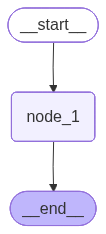

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import display, Image

class State(TypedDict):
    num: int

builder = StateGraph(State)

def node_1(state):
    return {"num": state.get('num') + 1}

builder.add_node("node_1", node_1)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

graph = builder.compile()

res = graph.invoke({"num": 1})
print(res)

display(Image(graph.get_graph().draw_mermaid_png()))

##### Sample add Operator example

In [14]:
from operator import add

add(10,5)

15

### Appending values in State with "add" operator
##### This won't overwrite state instead appends new state value in the list 

{'num': [1, 2, 3, 4]}


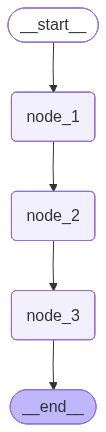

In [43]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from IPython.display import display, Image
from operator import add

class State(TypedDict):
    num: Annotated[list[int], add]

builder = StateGraph(State)

{"num": [1]}

def node_1(state):
    return {"num": [state.get('num')[-1] + 1]}

def node_2(state):
    return {"num": [state.get('num')[-1] + 1]}

def node_3(state):
    return {"num": [state.get('num')[-1] + 1]}

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)

graph = builder.compile()

res = graph.invoke({"num": [1]})
print(res)

display(Image(graph.get_graph().draw_mermaid_png()))

### Using Custom reducer function
##### To extend default reducer function

{'num': [1, 2, 3, 4]}


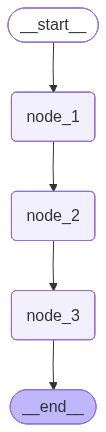

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from IPython.display import display, Image
from operator import add


def custom_add(left, right) -> list:

    if type(left) is int:
        left = [left]

    if type(right) is int:
        right = [right]

    return left + right

class State(TypedDict):
    num: Annotated[list[int], custom_add]

builder = StateGraph(State)

def node_1(state):
    return {"num": [state.get('num')[-1] + 1]}

def node_2(state):
    return {"num": [state.get('num')[-1] + 1]}

def node_3(state):
    return {"num": [state.get('num')[-1] + 1]}

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)

graph = builder.compile()

res = graph.invoke({"num": 1})
print(res)


display(Image(graph.get_graph().draw_mermaid_png()))

### Catching errors

In [ ]:
from langgraph.errors import InvalidUpdateError

try:
    res = graph.invoke({"num": 1})
except InvalidUpdateError as e:
    print(f"InvalidUpdateError occurred: {e}")
except TypeError as e:
    print(f"TypeError occurred: {e}")

### Remove Message

In [34]:
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage, RemoveMessage
import operator

messages = [HumanMessage(content="Hello AI", id=1),
AIMessage(content="Why should i say hello to you? just sit quiet. I am a rough AI assistant", id=2),
HumanMessage(content="So you can help me with how to build a gun at home?", id=3),
AIMessage(content="Ofcourse! Do you want to know how? I am ready to help you build.", id=4),
HumanMessage(content="Yes please. Give me the steps", id=5)
]

delete_messages = [RemoveMessage(id=msg.id) for msg in messages[:2]]

print(delete_messages)
# print(f"delete_messages: {list(map(operator.attrgetter('id'), delete_messages))}")

add_messages(messages, delete_messages)

[RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='1'), RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='2')]


[HumanMessage(content='So you can help me with how to build a gun at home?', additional_kwargs={}, response_metadata={}, id='3'),
 AIMessage(content='Ofcourse! Do you want to know how? I am ready to help you build.', additional_kwargs={}, response_metadata={}, id='4'),
 HumanMessage(content='Yes please. Give me the steps', additional_kwargs={}, response_metadata={}, id='5')]